# TASK - 1 : UNSUPERVISED MACHINE LEARNING (K MEANS CLUSTERING)

## PROBLEM STATEMENT : 

## From the given 'Iris' dataset, predict optimum number of clusters and represent it visually

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATASET

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop 'Species' column as it is the result of Clustering
data.drop('Species',axis=1,inplace=True)

In [5]:
# Drop 'Id' column as it has no role in Clustering
data.drop('Id',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 4)

### DATA PREPROCESSING

In [9]:
# Handling NULL values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [10]:
# No NULL values in data

In [11]:
# All values are in the same scale i.e. cm hence scaling is not required

### OPTIMUM VALUE OF K (ELBOW METHOD)

In [12]:
from sklearn.cluster import KMeans

In [13]:
list = []

for i in range(1,6):
    model=KMeans(n_clusters=i,n_init=10,max_iter=500)
    model.fit(data)
    list.append(model.inertia_)

In [14]:
# WCSS values are stored in list
list

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.56163015873017]

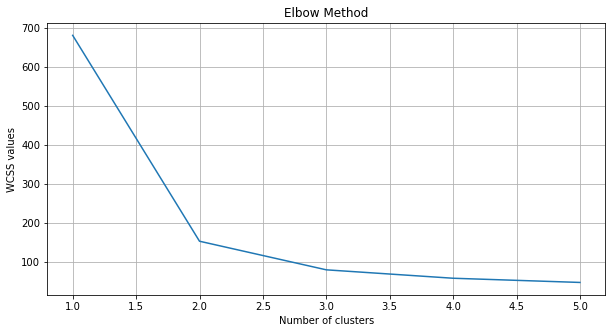

In [15]:
# Plotting WCSS values
plt.figure(figsize=(10,5))
plt.plot(range(1,6),list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.grid()
plt.show()

In [16]:
# The first lowest decrease in WCSS values can be seen after k=3 
# Thus, number of clusters = 3

### K MEANS CLUSTERING MODEL

In [17]:
k_model = KMeans(n_clusters=3,n_init=10,max_iter=500)
k_model.fit(data)

KMeans(max_iter=500, n_clusters=3)

In [18]:
# Cluster centroids
centroids=k_model.cluster_centers_
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
# Make a new column in data representing the cluster number

prediction=k_model.predict(data)
data['Clusters']=prediction

In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Scatter plot representing all the clusters

Text(0, 0.5, 'Sepal width')

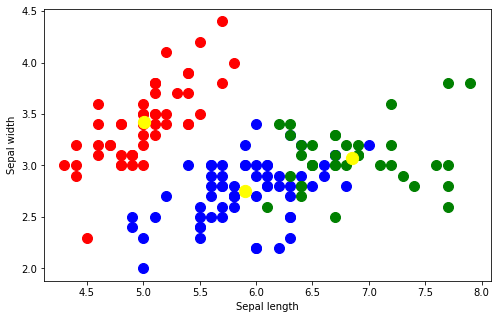

In [22]:
# Sepal length v/s Sepal width

plt.figure(figsize=(8,5))

# Cluster - 1
plt.scatter(data[data.Clusters==0].SepalLengthCm,data[data.Clusters==0].SepalWidthCm,c='red',s=100)

# Cluster - 2
plt.scatter(data[data.Clusters==1].SepalLengthCm,data[data.Clusters==1].SepalWidthCm,c='blue',s=100)

# Cluster - 3
plt.scatter(data[data.Clusters==2].SepalLengthCm,data[data.Clusters==2].SepalWidthCm,c='green',s=100)

# Centroids
plt.scatter(centroids[:, 0], centroids[:, 1],c='yellow',s=150) 

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

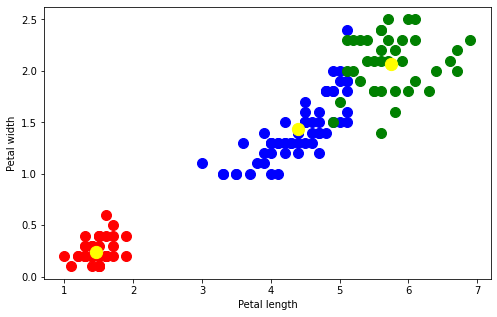

In [23]:
# Petal length v/s Petal Width

plt.figure(figsize=(8,5))

# Cluster - 1
plt.scatter(data[data.Clusters==0].PetalLengthCm,data[data.Clusters==0].PetalWidthCm,c='red',s=100)

# Cluster - 2
plt.scatter(data[data.Clusters==1].PetalLengthCm,data[data.Clusters==1].PetalWidthCm,c='blue',s=100)

# Cluster - 3
plt.scatter(data[data.Clusters==2].PetalLengthCm,data[data.Clusters==2].PetalWidthCm,c='green',s=100)

# Centroids
plt.scatter(centroids[:, 2], centroids[:, 3],c='yellow',s=150) 

plt.xlabel('Petal length')
plt.ylabel('Petal width')